### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Exploring the dataset

In [2]:
data = pd.read_csv('./train.csv')
print(data.shape)

data.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data["label"].unique() # Multi-class classification problem

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

<Axes: ylabel='Frequency'>

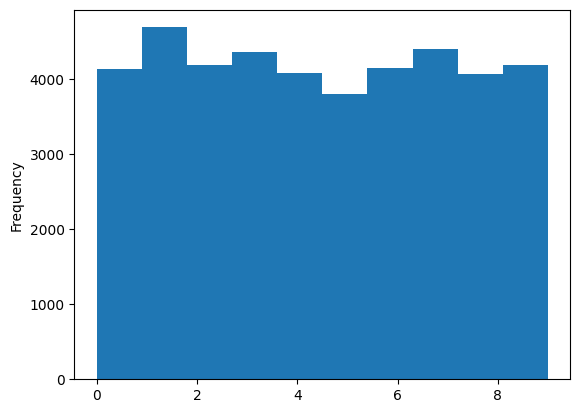

In [4]:
data["label"].plot(kind='hist')

In [5]:
type(data) # DataFrame

pandas.core.frame.DataFrame

In [6]:
data = np.array(data)
m, n = data.shape 
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [7]:
Y_train.shape

(41000,)

### Initialize weights and biases

In [8]:
W1 = np.random.rand(10, 784) * 0.5
b1 = np.random.rand(10, 1) * 0.5

W2 = np.random.rand(10, 10) * 0.5
b2 = np.random.rand(10, 1) * 0.5

In [9]:
W1.shape, b1.shape, W2.shape, b2.shape

((10, 784), (10, 1), (10, 10), (10, 1))

In [10]:
def init_params():
    W1 = np.random.rand(10, 784) * 0.5
    b1 = np.random.rand(10, 1) * 0.5
    W2 = np.random.rand(10, 10) * 0.5
    b2 = np.random.rand(10, 1) * 0.5
    
    return W1, b1, W2, b2 


In [11]:
def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z))

def ReLU(Z):
    return np.maximum(Z,0)

* Vanishing Gradient
* Exploding Gradient

![Sigmoid](https://hvidberrrg.github.io/deep_learning/activation_functions/assets/sigmoid_function.png
)

* Forward Propagation
  * Make a weighted guess

In [ ]:
def forward_prop(X,W1,b1,W2,b2):
    # weighted sums is calculated
    Z1 = W1.dot(X)+b1 # first layer - linear combination
    A1 = ReLU(Z1) # activation
    Z2 = W2.dot(A1) +b2 # second layer
    A2 = softmax(Z2) # probabilities
    return Z1, A1, Z2, A2

* Encoding

In [27]:
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

* Backward Propagation
  * The learning phase

Process of determining how much each weight and bias in the network contributed to the final error, allowing the network to correct itself.
  
To calculate the gradients of the loss function with respect to the parameters

In [ ]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    
    # output layer gradients
    dZ2 = A2 - one_hot_Y # Final error
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    
    # hidden layer gradients
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    
    return dW1, db1, dW2, db2

* Updating params
  * W_new = W_old - $\alpha$ . dW

Learning rate is ($\alpha$)

In [15]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

# Iterative optimization algorithm to find best parameters (weights and biases)
# To minimize the cost/loss function
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2


In [21]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)


Iteration:  0
[6 6 6 ... 6 6 6] [9 7 7 ... 0 7 0]
0.09819512195121952


/tmp/ipykernel_2648546/518423444.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(Z) / np.sum(np.exp(Z))
/tmp/ipykernel_2648546/518423444.py:2: RuntimeWarning: invalid value encountered in divide
  return np.exp(Z) / np.sum(np.exp(Z))


Iteration:  50
[0 0 0 ... 0 0 0] [9 7 7 ... 0 7 0]
0.09809756097560976
Iteration:  100
[0 0 0 ... 0 0 0] [9 7 7 ... 0 7 0]
0.09809756097560976
Iteration:  150
[0 0 0 ... 0 0 0] [9 7 7 ... 0 7 0]
0.09809756097560976
Iteration:  200
[0 0 0 ... 0 0 0] [9 7 7 ... 0 7 0]
0.09809756097560976
Iteration:  250
[0 0 0 ... 0 0 0] [9 7 7 ... 0 7 0]
0.09809756097560976
Iteration:  300
[0 0 0 ... 0 0 0] [9 7 7 ... 0 7 0]
0.09809756097560976
Iteration:  350
[0 0 0 ... 0 0 0] [9 7 7 ... 0 7 0]
0.09809756097560976
Iteration:  400
[0 0 0 ... 0 0 0] [9 7 7 ... 0 7 0]
0.09809756097560976
Iteration:  450
[0 0 0 ... 0 0 0] [9 7 7 ... 0 7 0]
0.09809756097560976


In [24]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(X, W1, b1, W2, b2)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  9


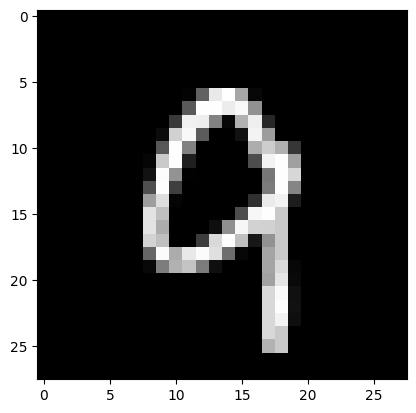

Prediction:  [0]
Label:  7


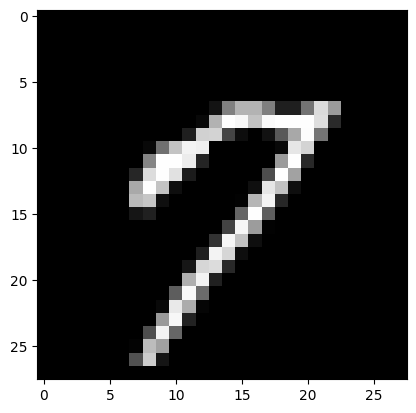

Prediction:  [0]
Label:  7


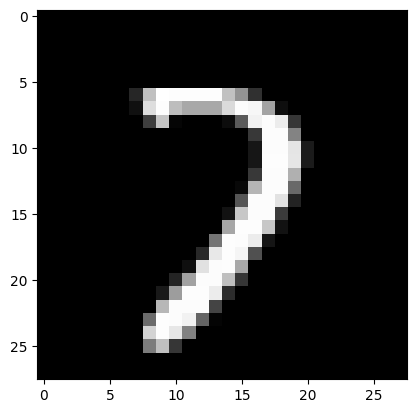

Prediction:  [0]
Label:  5


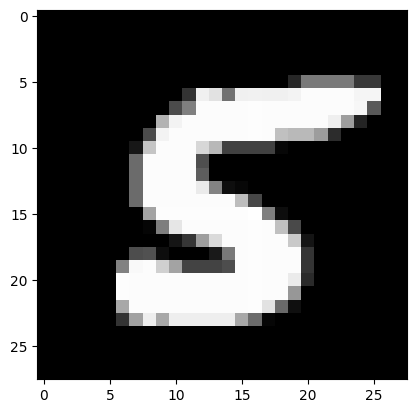

In [25]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)


### Feature Engineering
* Transforming raw data into relevant, informative features that ML model can use effectively.
  
1. Data Cleaning and Imputation
   1. Handling missing data
   2. Outliers handling
   3. Data type conversion  (strings -> numerical; boolean -> numerical)
2. Feature Transformation
   1. Feature Scaling/Normalization
   2. Encoding categorical variables
   

### Bias-Variance Tradeoff

* To find the ```sweet spot``` - a model complexity that minimizes the total prediction error

$$\text{Total Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}$$

* Bias - Too simple
  * Error caused by overly simple model relative to the dataset
  * High bias leads to underfitting

* Variance - Too sensitive
  * Error caused by model's excessive sensitivity to noise in the data.
  * High variance leads overfitting

|Model|Bias|Variance|Result|
|-----|----|-----|----|
|Simple Model|High|Low|Underfitting|
|Complex Model|Low|High|Overfitting|

### MLOps

* 20% - ML code
* 80% - Engineering, deployment, monitoring, and maintenance

#### Challenges of Deployment

* Latency
* Fairness
* Lack of Explainability

#### End-to-End Project Implementation

* Ingestion and Cleaning
* Training and Evaluation
* Experiment 
